The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe. Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:
**id** : station identification code .
**date :** date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
**element**: indicator of element type
**TMAX **: Maximum temperature (tenths of degrees C)
**TMIN** : Minimum temperature (tenths of degrees C)
**value**: data value for element (tenths of degrees C)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Get the actual key from the uploaded dictionary
uploaded_file_name = list(uploaded.keys())[0]  # Assuming only one file was uploaded

# Use the actual key to access the uploaded file
data = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))

Saving temperature (1) (1) (1) (1).csv to temperature (1) (1) (1) (1).csv


In [3]:
data

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [5]:
data.describe()

,Data_Value
count,165085.000000
mean,95.422116
std,123.515131
min,-343.000000
25%,0.000000
50%,94.000000
75%,189.000000
max,406.000000


In [6]:
# Convert date column to datetime format and extract year and day of the year
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['day_of_year'] = data['Date'].dt.strftime('%m-%d')


In [7]:
data

,ID,Date,Element,Data_Value,year,day_of_year
0,USW00094889,2014-11-12,TMAX,22,2014,11-12
1,USC00208972,2009-04-29,TMIN,56,2009,04-29
2,USC00200032,2008-05-26,TMAX,278,2008,05-26
3,USC00205563,2005-11-11,TMAX,139,2005,11-11
4,USC00200230,2014-02-27,TMAX,-106,2014,02-27
...,...,...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256,2015,06-09
165081,USC00205822,2009-10-06,TMAX,167,2009,10-06
165082,USC00205050,2014-07-14,TMAX,283,2014,07-14
165083,USC00200230,2006-11-29,TMIN,117,2006,11-29


Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.


In [8]:
# Remove leap days
data = data[~((data['Date'].dt.month == 2) & (data['Date'].dt.day == 29))]



In [9]:
# Separate data into 2005-2014 period and 2015
data_2005_2014 = data[(data['year'] >= 2005) & (data['year'] <= 2014)]
data_2015 = data[data['year'] == 2015]

In [10]:
record_highs = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
record_lows = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()

In [11]:
# Calculate 2015 highs and lows
highs_2015 = data_2015[data_2015['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
lows_2015 = data_2015[data_2015['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()


In [12]:
# Find points where 2015 breaks the record highs or lows
record_high_broken = highs_2015[highs_2015 > record_highs]
record_low_broken = lows_2015[lows_2015 < record_lows]

 Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
****

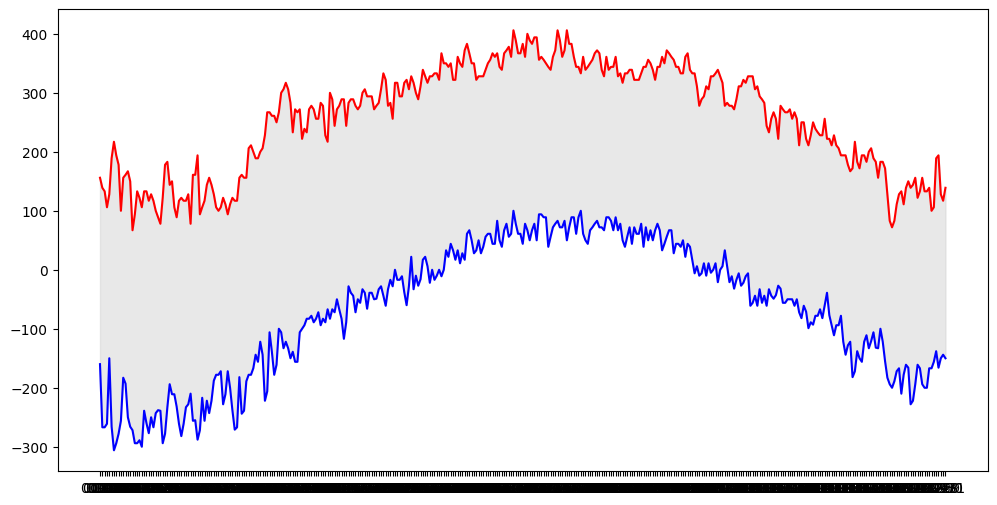

In [13]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(record_highs.index, record_highs.values, label='Record Highs (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Lows (2005-2014)', color='blue')
plt.fill_between(record_highs.index, record_highs.values, record_lows.values, color='lightgray', alpha=0.5)


Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.


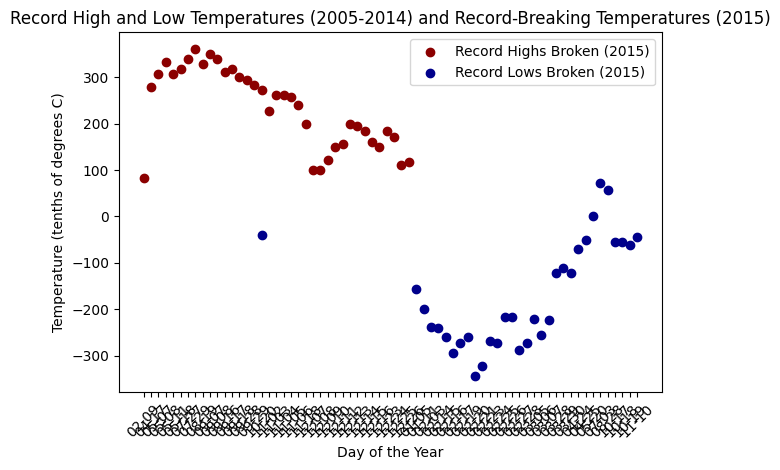

In [14]:

plt.scatter(record_high_broken.index, record_high_broken.values, color='darkred', label='Record Highs Broken (2015)')
plt.scatter(record_low_broken.index, record_low_broken.values, color='darkblue', label='Record Lows Broken (2015)')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Record High and Low Temperatures (2005-2014) and Record-Breaking Temperatures (2015)')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Get the actual key from the uploaded dictionary
uploaded_file_name = list(uploaded.keys())[0]  # Assuming only one file was uploaded

# Use the actual key to access the uploaded file
df = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))

Saving BinSize (1) (1) (1) (1).csv to BinSize (1) (1) (1) (1).csv


In [16]:
df

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,ZA000067633,-15.250,23.150,1053.0,NaN,MONGU,GSN,NaN,67633.0,2.483523e+06,-1.695725e+06,2480265.1895748563 to 2577598.618291222,-1705072.2452288494 to -1607738.8165124834,"2480265.1895748563 to 2577598.618291222, -1705...",c1f39870d7200ac9fa7748c4d6688cbbe48cd3ac4c4a9e...
18255,ZA000067743,-17.817,25.817,986.0,NaN,LIVINGSTONE,GSN,NaN,67743.0,2.733040e+06,-1.981163e+06,2674932.047007587 to 2772265.4757239525,-1997072.531377945 to -1899739.1026615791,"2674932.047007587 to 2772265.4757239525, -1997...",25cba19cddf24c1999b6b8812cbccbb2fc8f3e64715d73...
18256,ZI000067775,-17.917,31.133,1480.0,NaN,HARARE (KUTSAGA),GSN,NaN,67775.0,3.293948e+06,-1.992282e+06,3258932.6193057783 to 3356266.048022144,-1997072.531377945 to -1899739.1026615791,"3258932.6193057783 to 3356266.048022144, -1997...",6c7f11051d64bc4f778b4d2417b11ec72b4f655aed5fea...
18257,ZI000067975,-20.067,30.867,1095.0,NaN,MASVINGO,NaN,NaN,67975.0,3.223893e+06,-2.231352e+06,3161599.190589413 to 3258932.6193057788,-2289072.817527041 to -2191739.388810675,"3161599.190589413 to 3258932.6193057788, -2289...",1d695305fb4a37e8903ca1b196f14d940b84cbc1c31d4b...


In [17]:
import pandas as pd
import folium

# Load the data with station information (you need a dataset with latitude and longitude for each station)
# For demonstration, let's assume the station data has columns: 'station_id', 'latitude', 'longitude'
stations_data = pd.DataFrame({
    'ID': ['Station_A', 'Station_B', 'Station_C'],
    'LATITUDE': [42.2808, 42.2830, 42.2748],
    'LONGITUDE': [-83.7430, -83.7396, -83.7490]
})

# Create a Folium map centered around Ann Arbor, Michigan
map_ann_arbor = folium.Map(location=[42.2808, -83.7430], zoom_start=12)

# Add station markers to the map
for _, station in stations_data.iterrows():
    folium.Marker(
        location=[station['LATITUDE'], station['LONGITUDE']],
        popup=f"ID: {station['ID']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_ann_arbor)

# Save the map as an HTML file and display
map_ann_arbor.save('ann_arbor_stations_map.html')
print("Station map has been saved as 'ann_arbor_stations_map.html'")


Station map has been saved as 'ann_arbor_stations_map.html'


In [18]:
# Convert 'date' column to datetime format for easy filtering
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-18-e82a5135db66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [20]:
# Filter data for the year 2015
data_2015 = data[(data['Date'].dt.year == 2015)]


In [23]:
stations_ann_arbor_ids = data['ID'].unique()
data_2015_ann_arbor = data_2015[data_2015['ID'].isin(stations_ann_arbor_ids)]

In [24]:
tmax_2015 = data_2015_ann_arbor[data_2015_ann_arbor['Element'] == 'TMAX']
tmin_2015 = data_2015_ann_arbor[data_2015_ann_arbor['Element'] == 'TMIN']

In [25]:
tmax_2015_daily = tmax_2015.groupby('Date')['Data_Value'].mean()
tmin_2015_daily = tmin_2015.groupby('Date')['Data_Value'].mean()


In [26]:
daily_average_temp = (tmax_2015_daily + tmin_2015_daily) / 2


In [27]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

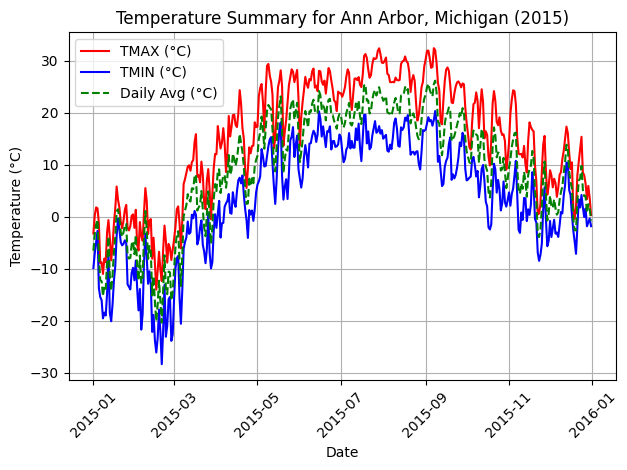

Temperature summary plot has been saved as 'ann_arbor_temperature_summary_2015.png'


In [30]:
# Plot daily TMAX, TMIN, and Average temperature
plt.plot(tmax_2015_daily.index, tmax_2015_daily / 10, color='red', label='TMAX (°C)')
plt.plot(tmin_2015_daily.index, tmin_2015_daily / 10, color='blue', label='TMIN (°C)')
plt.plot(daily_average_temp.index, daily_average_temp / 10, color='green', linestyle='--', label='Daily Avg (°C)')

# Add labels and legend
plt.title('Temperature Summary for Ann Arbor, Michigan (2015)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('ann_arbor_temperature_summary_2015.png')
plt.show()
print("Temperature summary plot has been saved as 'ann_arbor_temperature_summary_2015.png'")